<a href="https://colab.research.google.com/github/Iulia2701/proiecte_comune/blob/main/Proiectul_integru_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



> ![alt text](https://drive.google.com/uc?export=view&id=13nhnc1jKu84Cjoj7UZad25BCYeeIXvsk)



# 📚 **Introducerea**

Diamonds Bois este o companie nouă ce vrea să își facă nume în lumea aceasta monopolizată a diamantelor și s-a adresat la biroul nostru de Data Science pentru a determina cele mai profitabile achiziții posibile anul acesta și a obține clienți fideli.


Noi, Echipa [Delta Salem](https://colab.research.google.com/drive/1gp-S9AWbrVSbxC52q0qbjct5UaTTt2YB#scrollTo=wjgfmFpPXoYr&line=1&uniqifier=1), am determinat și clasificat publicul ce ar fi interesat în activitatea acesteia și venim cu sugestii despre cele mai fierbinți oferte pentru fiecare.

Putem deosebi trei grupuri de bază:
1.	Experții din domeniu
2.	Publicul amator, care se divide în baza influenței și bugetului în:

    a.	Colecționari și VIP personalități;

    b.	Publicul larg;



# 🎯 **Întrebările cercetate**

În baza listei de potențiali clienți indicate mai sus, au fost analizate următoarele întrebări:

* Câte diamante și la ce preț propunem pentru categoria de experți?

* Câte diamante și la ce preț propunem pentru categoria de agenți PR?

* Câte diamante pot fi achiziționate pentru publicul amator?

* Ce prețuri, per categorie și carat, pot fi propuse colecționarilor amatori de diamante?

* Ce importanță are culoarea la alegerea unui diamant accesibil după preț din colecția de bază a sezonului următor?

* Care sunt seturile de bijuterii care pot fi formate pentru următorul sezon?

# ⚠️ **Pregătirea bazei de date**

Importăm instrumentele și fișierul cu date despre diamante pe care le vom utiliza în cadrul studiului.

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import urllib, csv
 
path = "https://girlsgoitpublic.z6.web.core.windows.net/diamonds.csv"
 
response = urllib.request.urlopen(path)
lines = [l.decode('utf-8') for l in response.readlines()]
 
content = csv.reader(lines)
all_lines = list(content)

## ❌ **Înlăturarea datelor eronate**

Deși fișierul cu date importat este preluat de pe o resursă veridică, totuși necesită prelucrare pentru a ne asigura că în lista cu care vom lucra nu se vor strecura date eronate și nu vor fi elemente cu date lipsă.

Verificăm dacă nu avem dubluri.

In [ ]:
nice_try_dublu = []
dub = set()
for diam in all_lines:
  if tuple(diam[1:]) in dub:
    nice_try_dublu.append(diam)
  else:
    dub.add(tuple(diam[1:]))
print('Sunt dublicat', len(nice_try_dublu))  

Sunt dublicat 146


Programul nostru arată că sunt 146 de dubluri.

Verificăm dacă nu sunt absente datele x, y, z și ne asigurăm că înălțimea diamantelor corespunde valorilor obținute prin formula:


```
 depth = 2 * z / (x + y) * 100%
```
Nu uităm să luăm în considerare și rotunjirea valorilor la calculele inițiale.




In [ ]:
nice_try_no_data = []
nice_try_incorect_depth = []
for diam in all_lines[1:]:
  if float(diam[-1]) == 0 or float(diam[-2]) == 0 or float(diam[-3]) == 0:
    nice_try_no_data.append(diam)
  else: 
    dep = 2*float(diam[-1])/(float(diam[-2]) + float(diam[-3]))*100
    if abs(float(diam[5]) - dep) > 0.2:
      nice_try_incorect_depth.append(diam)
print('Lisesc valorile de înălțime a %s de diamante; date mărite în alte %s.' %  (len(nice_try_no_data), len(nice_try_incorect_depth)))

Lisesc valorile de înălțime a 20 de diamante; date mărite în alte 475.


Observăm că lipsesc valorile de înălțime a 20 de diamante și avem date mărite în 
alte 475.

Verificăm corectitudinea datelor pentru carat, mai exact dacă corespund 
criteriilor de valoare (între 0,2 și 5,01) și dacă nu sunt date lipsă. 



In [ ]:
nice_try2 = list()
for diam in all_lines[1:]:
  if float(diam[1]) < 0.2 or float(diam[1]) > 5.01:
    print('Date eronate', diam[0])
    nice_try2.append(diam[0])
if len(nice_try2) != 0:
  print(len(nice_try2))
else:
  print('Nu sunt date eronate pentru carat.')


Nu sunt date eronate pentru carat.


În urma verificării bazei de date, observăm ca nu există date eronate ale carat-ului și toate valorile acestuia corespund intervalului stabilit inițial.

Verificăm veridicitatea datelor pentru tăietură, întrucât trebuie să avem doar 5 valori: „Ideal”, ”Premium”, „Good”, „Very Good” și „Fair”.

In [ ]:
cut = dict()
for diam in all_lines[1:]:
  if diam[2] in cut.keys():
     cut[diam[2]] += 1
  else:
     cut[diam[2]] = 1
verifying = []
for i in cut:
    verifying.append(cut.keys())
print(cut)
print('În total avem %s tipuri de tăietură.'  % len(verifying))

{'Ideal': 21551, 'Premium': 13791, 'Good': 4906, 'Very Good': 12082, 'Fair': 1610}
În total avem 5 tipuri de tăietură.


În urma verificării datelor, observăm că avem 5 valori stabilite inițial pentru tăietură: „Ideal”, ”Premium”, „Good”, „Very Good” și „Fair”. De aici rezultă că datele sunt corecte.

Verificăm dacă nu sunt date lipsă sau nule pentru tabletă.


In [ ]:
nice_try3 = list()
for dim in all_lines[1:]:
  if float(diam[-5]) <= 0:
    print('Date lipsă ', diam[0])
    nice_try.append(diam[0])
if len(nice_try3) == 0:
    print('Nu există date lipsă.')
else:
    print("Sunt %s %s" % (len(nice_try3)," date lipsă sau nule."))

Nu există date lipsă.


Verificarea a fost efectuată cu succes și nu există date lipsă sau nule pentru tabletă.

Cercetăm corectitudinea datelor pentru culoare și claritate.

Criteriile pentru culoare sunt: D, E, F, G, H, I, J.

Criteriile pentru claritate sunt: IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1.

In [ ]:
nice_try = []
color = "DEFGHIJ"
for diam in all_lines[1:]:
 if color.find(diam[3]) == -1 :
  print('Culoare gresita:', diam[0])
  nice_try.append(diam)
 else:
  if diam[4] != "IF" and diam[4] != "VVS1" and diam[4] != "VVS2" and diam[4] != "VS1" and diam[4] != "VS2" and diam[4] != "SI1" and diam[4] != "SI2" and diam[4] != "I1":
   print('Claritate gresita: ', diam[0])
   nice_try.append(diam)
print(len(nice_try))

0


Nu există date greșite pentru culoare și claritate.

Eliminăm datele lipsă, duplicatele și datele corupte din lista de diamante cu care lucrăm.

In [ ]:
diamonds = []
for diam in all_lines:
  if diam not in nice_try_dublu and diam not in nice_try_no_data and diam not in nice_try_incorect_depth:
    diamonds.append(diam)

print(len(diamonds))
print(len(all_lines))
print(diamonds[:100])

53303
53941
[['', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z'], ['2', '0.21', 'Premium', 'E', 'SI1', '59.8', '61', '326', '3.89', '3.84', '2.31'], ['3', '0.23', 'Good', 'E', 'VS1', '56.9', '65', '327', '4.05', '4.07', '2.31'], ['4', '0.29', 'Premium', 'I', 'VS2', '62.4', '58', '334', '4.2', '4.23', '2.63'], ['5', '0.31', 'Good', 'J', 'SI2', '63.3', '58', '335', '4.34', '4.35', '2.75'], ['6', '0.24', 'Very Good', 'J', 'VVS2', '62.8', '57', '336', '3.94', '3.96', '2.48'], ['7', '0.24', 'Very Good', 'I', 'VVS1', '62.3', '57', '336', '3.95', '3.98', '2.47'], ['8', '0.26', 'Very Good', 'H', 'SI1', '61.9', '55', '337', '4.07', '4.11', '2.53'], ['9', '0.22', 'Fair', 'E', 'VS2', '65.1', '61', '337', '3.87', '3.78', '2.49'], ['10', '0.23', 'Very Good', 'H', 'VS1', '59.4', '61', '338', '4', '4.05', '2.39'], ['11', '0.3', 'Good', 'J', 'SI1', '64', '55', '339', '4.25', '4.28', '2.73'], ['12', '0.23', 'Ideal', 'J', 'VS1', '62.8', '56', '340', '3.93', '3.9', '2.46'],

**Deci, avem la dispozitie 53303 diamante in lista diamonds.**

## **🔎 Separarea diamantelor pe categorii:**

### **💎 Diamante pentru experți și PR agenți**

Grupul prioritizat inițial a fost cel al experților care necesită diamante de cea mai înaltă calitate, sunt gata să plăteasca sume considerabile pentru a le obține și pot ajuta în construirea și extinderea brand-ului.

In [ ]:
knowing_crowd_d = []
unknowing_crowd_d = []
for d in diamonds:
  if d[2] == 'Premium' or d[2] == 'Ideal':
    if d[3] in ('D', 'E', 'F'):
      if d[4] in ('IF', 'VVS1', 'VVS2'):
        knowing_crowd_d.append(d)

for d in diamonds[1:]:
  if d not in knowing_crowd_d:
    unknowing_crowd_d.append(d)

print('Avem %i diamante pentru persoane pricepute in domeniu' %len(knowing_crowd_d))
print('Avem %i diamante pentru persoane cu un interes superficial in domeniu' %len(unknowing_crowd_d))

Avem 3223 diamante pentru persoane pricepute in domeniu
Avem 50079 diamante pentru persoane cu un interes superficial in domeniu


**Caracteristicile diamantelor pentru experți și PR**

În timpul studiului au aparut întrebări despre atragerea grupului dat. Am remarcat că ar fi beneficială organizarea  unei campanii de PR ce ar informa grupul de experți despre propunerile companii.

Pentru aceasta s-a decis să se selecteze diamante cu prețuri ce nu întrec valoarea de $700 cu calitatea cea mai înaltă.

In [ ]:
prices_pr = []
prices_experts = []
for d in knowing_crowd_d:
    if int(d[-4]) > 700:
       prices_experts.append(d)
    else:
       prices_pr.append(d)
print('PR: %s' % prices_pr)
print('Experți: %s' %prices_experts)

PR: [['70', '0.24', 'Premium', 'E', 'VVS1', '60.7', '58', '553', '4.01', '4.03', '2.44'], ['83', '0.26', 'Ideal', 'E', 'VVS2', '62.9', '58', '554', '4.02', '4.06', '2.54'], ['2721', '0.26', 'Ideal', 'E', 'VVS2', '62.5', '55', '564', '4.07', '4.09', '2.55'], ['3749', '0.23', 'Premium', 'F', 'VVS2', '61.3', '59', '571', '3.99', '3.94', '2.43'], ['6037', '0.25', 'Ideal', 'F', 'VVS1', '60.9', '57', '575', '4.06', '4.09', '2.48'], ['6378', '0.25', 'Premium', 'E', 'VVS1', '60.7', '60', '576', '4.09', '4.11', '2.49'], ['6379', '0.25', 'Ideal', 'E', 'VVS1', '61.2', '57', '576', '4.08', '4.12', '2.51'], ['6380', '0.25', 'Premium', 'E', 'VVS2', '61.5', '59', '576', '4.02', '4.04', '2.48'], ['6381', '0.25', 'Premium', 'E', 'VVS2', '62.5', '59', '576', '4.02', '4.05', '2.52'], ['6382', '0.25', 'Ideal', 'E', 'VVS2', '62.1', '57', '576', '4.04', '4.07', '2.52'], ['6383', '0.25', 'Premium', 'E', 'VVS2', '62', '59', '576', '4.05', '4.08', '2.52'], ['6384', '0.25', 'Premium', 'F', 'IF', '61.1', '58', '

Acum avem clasificate diamantele pentru persoanele pricepute în acest domeniu în două categorii:

- Diamante pentru experți;
- Diamante pentru PR

Pentru a le oferi clienților cea mai bună experiență, vom împărți diamantele destinate experților în următoarele categorii, bazate pe dimensiunea caratului:

- Diamante cu valoarea caratului mica (mai mică decât 1);

- Diamante cu valoarea caratului medie (între 1 și 3 inclusiv);

- Diamante cu valoarea caratului mare (mai mare decât 3);

Verificăm dacă avem diamante pentru fiecare categorie de mai sus:

In [ ]:
counter1 = 0
counter2 = 0
counter3 = 0
for d in prices_experts[0:]:
    if float(d[1]) < 1:
      counter1 += 1
for d in prices_experts[0:]:
    if float(d[1]) >= 1 and float(d[1]) <= 3:
      counter2 += 1
for d in prices_experts[0:]:
    if float(d[1]) > 3 :
      counter3 += 1
if counter1 > 0:
  print('True')
else:
  print('False')
if counter2 > 0:
  print('True')
else:
  print('False')
if counter3 > 0:
  print('True')
else:
  print('False')

  #counter3 ne returneaza valoarea ('False'), de unde rezulta ca noi nu avem in diamantele pentru experti, diamante cu 3+ carate.

True
True
False


Avem diamante doar cu valoarea caratului mică și medie, deci vom lucra doar cu aceste date. Numărul diamantelor ce au valoarea caratului mare va fi din start egala cu 0.

De asemenea, pentru a reprezenta graifc cantitatea de diamante, vom împărți diamantele în grupuri de carate mici, medii și mari.

In [ ]:

ex1 = 0
ex2 = 0
counter1 = 0
couter2 = 0
excarat_prices = {}
for d in prices_experts[0:]:
    if float(d[1]) < 1:
        ex1 += int(d[-4])
        counter1 += 1
    elif float(d[1]) >= 1 and float(d[1]) <= 3:
        ex2 += int(d[-4])
        counter2 += 1
average1 = ex1 / counter1
average2 = ex2 / counter2
excarat_prices["carate mici"] = int(average1)
excarat_prices["carate medii"] = int(average2)
excarat_prices["carate mari"] = 0
print(excarat_prices)


{'carate mici': 1586, 'carate medii': 5763, 'carate mari': 0}


Avem 1586 diamante ce au dimensiuni mici, 5763 diamante ce au dimensiunile medii și 0 diamante ce au dimensiuni mari.

De asemenea, vom împărți diamantele destinate agenților PR în următoarele categorii, bazate pe dimensiunea caratului:

Diamante cu valoarea caratului mica (mai mică decât 1);

Diamante cu valoarea caratului medie (între 1 și 3 inclusiv);

Diamante cu valoarea caratului mare (mai mare decât 3);

Verificăm dacă avem diamante pentru fiecare categorie de mai sus:

In [ ]:
counter4 = 0
counter5 = 0
counter6 = 0
for d in prices_pr[0:]:
    if float(d[1]) < 1:
      counter4 += 1
for d in prices_pr[0:]:
    if float(d[1]) >= 1 and float(d[1]) <= 3:
      counter5 += 1
for d in prices_pr[0:]:
    if float(d[1]) > 3 :
      global counter6
      counter6 += 1
if counter4 > 0:
  print('True')
else:
  print('False')
if counter5 > 0:
  print('True')
else:
  print('False')
if counter6 > 0:
  print('True')
else:
  print('False')
  #counter5 ne returneaza valoarea ('False'), de unde rezulta ca noi nu avem in diamantele pentru pr, diamante medii.
  #counter6 ne returneaza valoarea ('False'), de unde rezulta ca noi nu avem in diamantele pentru pr, mari.

True
False
False


Avem diamante doar cu valoarea caratului mică, deci vom lucra doar cu aceste date. Numărul diamantelor ce au valoarea caratului medie și mare vor fi din start egale cu 0.

In [ ]:
pr1 = 0
prcarat_prices = {}
for d in prices_pr[0:]:
    if float(d[1]) < 1:
        pr1 += int(d[-4])
average4 = pr1 / counter4
prcarat_prices["carate mici"] = int(average4)
prcarat_prices["carate medii"] = 0
prcarat_prices["carate mari"] = 0
print(prcarat_prices)

{'carate mici': 617, 'carate medii': 0, 'carate mari': 0}


Avem 617 diamante ce au dimensiuni mici, 0 diamante ce au dimensiunile medii și 0 diamante ce au dimensiuni mari.

Vom separa numele și prețul diamantelor destinate agenților PR în liste separate. Acestea ne vor ajuta la construirea graficelor.

In [ ]:
prcarat_priceslist = []
pr_diamonds = []
for d in prices_pr[0:]:
    if float(d[1]) < 1:
        prcarat_priceslist.append(d[-4])
        pr_diamonds.append(d[0])                       
print(prcarat_priceslist)
print(pr_diamonds)

['553', '554', '564', '571', '575', '576', '576', '576', '576', '576', '576', '576', '576', '576', '583', '586', '586', '586', '597', '597', '599', '599', '599', '599', '599', '599', '599', '599', '599', '599', '599', '599', '599', '599', '599', '608', '612', '612', '620', '620', '620', '620', '622', '622', '622', '622', '622', '622', '622', '622', '622', '622', '622', '633', '635', '635', '635', '640', '640', '642', '642', '642', '642', '642', '646', '646', '646', '646', '646', '646', '646', '650', '657', '657', '659', '664', '667', '668', '668', '668', '668', '669', '669', '669', '678', '678', '678', '678', '678', '678', '678', '678', '678', '678', '678', '678', '678', '678', '680', '680', '680', '680', '680', '680', '684', '684', '688', '694', '694', '694', '694', '694', '694', '694', '694', '694', '694', '695', '700', '445', '505', '511', '526', '526', '526', '526', '526', '526', '530', '530', '530', '530', '530', '530', '530', '530', '530', '530', '538', '540', '540', '552', '552'

### 💎 Diamante pentru publicul larg și colecționari.

Deși am clasat inițial grupurile de clienți în experți din domeniu și publicul amator, din considerentul bugetului variat al acestui public și al influenței, a mai fost nevoie de încă o împărțire a celui din urmă.

În colecționari/personalități celebre și publicul de bază.

Pe când colecționarii pot avea cerințe mai excentrice în legătură cu mărimile și calitățile diamantelor, publicul larg se bazează în mare parte pe accesibilitatea prețurilor și atractivitatea modelelor expuse în colecția de bază.

Astfel, pentru a delimita inițial cele două grupuri, s-a stabilit media prețurilor diamantelor propuse în fișier, după care s-a comparat cu prețurile acceptate pentru nestemate pe piață.

In [ ]:
price = 0
count = 0
for diam in unknowing_crowd_d[1:]:
  price += int(diam[7])
  count += 1

average_price = float(price) / count
print('Prețul mediu: %.02f' %average_price)
reserved_diamonds = [] # lista de diamante pentru persoane publice si colectionari
reserve = 0
collection_diamonds = [] # lista de diamante pentru colectia toamna-iarna 
collection = 0
for diam in unknowing_crowd_d:
   if float(diam[7]) < average_price:
     collection += 1
     collection_diamonds.append(diam)
   else:
     reserve += 1
     reserved_diamonds.append(diam)

Prețul mediu: 3986.60


Conform studiului sursei 2.2 și 2.3 (vezi Bibliografia), prețul mediu obținut se apropie de valorile maxime acceptabile de publicul larg. Astfel, putem rezerva pentru colecția de bază diamantele cu prețuri sub medie, restul rămânând pentru colecționari și celebrități.

# **❓ Analiza întrebarilor interesate:**


## 🟣 Câte diamante și la ce preț propunem pentru categoria de experți?




Pentru a le oferi clienților cea mai bună experiență, categoria de experți va beneficia de diamantele de cea mai înaltă calitate ce este oferită doar de cele cu dimensiuni mici și medii, care au prețul și stocul următor:

**Reprezentarea grafică:**

Text(0, 0.5, 'Cantitatea diamantelor')

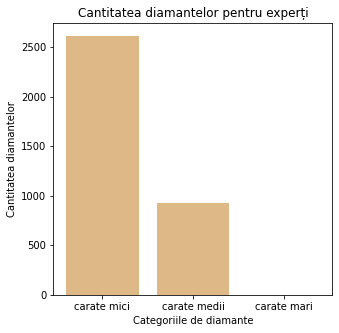

In [ ]:
a = list(excarat_prices.keys())
b = list(prcarat_prices.keys()) 

fig = plt.figure(figsize=(5, 5))
x1 = a
y1 = [counter1, counter2, counter3]
plt.bar(x1, y1, color = "burlywood")

plt.title('Cantitatea diamantelor pentru experți')
plt.xlabel("Categoriile de diamante")
plt.ylabel("Cantitatea diamantelor")


[5914.0, 7204.0, 7741.0, 7849.0, 7882.0, 8065.0, 8154.0, 8319.0, 8400.0, 8445.0, 8448.0, 8469.0, 8470.0, 8527.0, 8532.0, 8532.0, 8532.0, 8579.0, 8602.0, 8602.0, 8610.0, 8616.0, 8619.0, 8623.0, 8688.0, 8688.0, 8688.0, 8688.0, 8693.0, 8701.0, 8722.0, 8736.0, 8743.0, 8774.0, 8776.0, 8811.0, 8860.0, 8870.0, 8888.0, 8888.0, 8903.0, 8905.0, 8924.0, 8946.0, 8954.0, 8958.0, 8971.0, 8972.0, 8982.0, 9005.0, 9013.0, 9014.0, 9032.0, 9040.0, 9050.0, 9050.0, 9065.0, 9070.0, 9082.0, 9092.0, 9103.0, 9115.0, 9118.0, 9131.0, 9131.0, 9138.0, 9139.0, 9146.0, 9169.0, 9205.0, 9212.0, 9218.0, 9231.0, 9245.0, 9254.0, 9254.0, 9257.0, 9259.0, 9274.0, 9281.0, 9310.0, 9316.0, 9343.0, 9354.0, 9377.0, 9412.0, 9413.0, 9461.0, 9463.0, 9479.0, 9483.0, 9505.0, 9521.0, 9547.0, 9548.0, 9550.0, 9552.0, 9598.0, 9598.0, 9627.0, 9634.0, 9641.0, 9645.0, 9660.0, 9668.0, 9711.0, 9711.0, 9712.0, 9724.0, 9735.0, 9784.0, 9798.0, 9817.0, 9843.0, 9845.0, 9858.0, 9863.0, 9870.0, 9881.0, 9882.0, 9897.0, 9901.0, 9901.0, 9918.0, 9918.0,

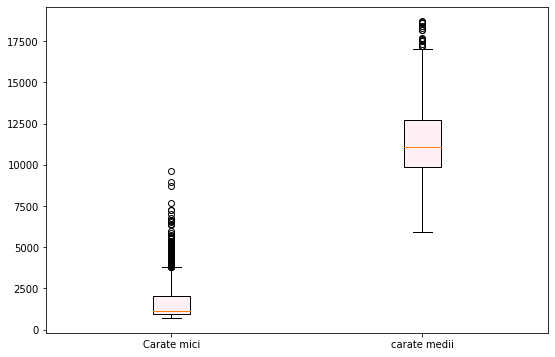

In [ ]:
data_boxplot=[pret_carate_mici, pret_carate_medii]
print(pret_carate_medii)

fig=plt.figure(1, figsize=(9, 6))

ax=fig.add_subplot(111)
bp=ax.boxplot(data_boxplot, patch_artist=True)
for box in bp['boxes']:
 box.set(facecolor='lavenderblush')
ax.set_xticklabels(['Carate mici', 'carate medii'])
fig.savefig('fig1.png', bbox_inches='tight')

*🎓 Concluzia întrebării:*

În baza de date studiată sunt 2612 diamante ce au valoare caratului mică, 930 de bucăți ce au valoarea caratului medie și 0 diamante ce au valoarea caratului mare.

De asemenea, prețul diamantelor mici variază între 2761 și 2753 dolari, iar prețul celor medii variază între 5914 și 18700 dolari.

## 🟢 Câte diamante și la ce preț propunem pentru categoria de agenți PR?


Precum s-a menționat mai devreme, de diamantele transmise grupului de PR va depinde numărul de clienți atât din publicul larg cât şi al experților, deci e necesară selectarea diamantelor de calitate înaltă şi preț rezonabil. 

Pentru aceasta au fost alese diamante mici cu următorul preț și cantitate:

**Reprezentarea grafică:**

In [ ]:
number_dict = {}
for diam in prcarat_priceslist:
  if diam in number_dict:
    number_dict[diam] += 1
  else:
    number_dict[diam] = 1
items = number_dict.items()
sorted_items = sorted(items)
number_dictpr = sorted_items
print(number_dictpr)

[('445', 1), ('505', 1), ('511', 1), ('526', 6), ('530', 10), ('538', 1), ('540', 2), ('552', 5), ('553', 1), ('554', 1), ('564', 1), ('571', 1), ('575', 1), ('576', 9), ('583', 1), ('586', 3), ('597', 2), ('599', 15), ('608', 1), ('612', 2), ('620', 4), ('622', 11), ('633', 1), ('635', 3), ('640', 2), ('642', 5), ('646', 7), ('650', 1), ('657', 2), ('659', 1), ('664', 1), ('667', 1), ('668', 4), ('669', 3), ('678', 14), ('680', 6), ('684', 2), ('688', 1), ('694', 10), ('695', 1), ('700', 1)]


Text(0.5, 1.0, 'Cantitatea de diamante clasificate pe preț pentru PR')

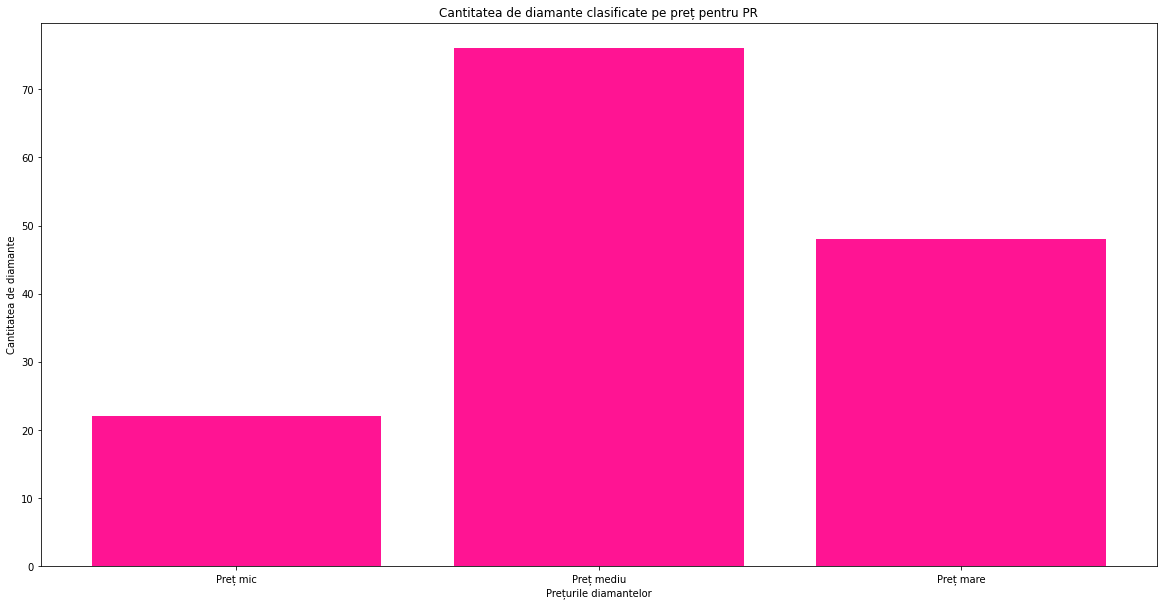

In [ ]:
low_price_quantity = 0
medium_price_quantity = 0
high_price_quantity = 0
for diam in number_dictpr[0:]:
    if float(diam[0]) <= 550:
      low_price_quantity += diam[1]
    elif float(diam[0]) > 550 and float(diam[0]) < 650: 
      medium_price_quantity += diam[1]
    elif float(diam[0]) >= 650 and float(diam[0]) <= 700:
      high_price_quantity += diam[1]
x = ["Preț mic", "Preț mediu", "Preț mare"]
y = [low_price_quantity, medium_price_quantity, high_price_quantity]
plt.figure(figsize=(20,10))
plt.bar(x,y, color = "deeppink")
plt.xlabel('Prețurile diamantelor')
plt.ylabel('Cantitatea de diamante')
plt.title('Cantitatea de diamante clasificate pe preț pentru PR')


🎓 *Concluzia întrebării:*
Pentru agenții de PR, în baza de date, după criteriile menționate mai sus avem diamante la preț:

- Mic (până la 550 de dolari): 22 bucăți.

- Mediu (între 550 și 650 de dolari): 76 bucăți.

- Mare (între 650 și 700 de dolari): 48 bucăți.

## 🟡 Câte diamante pot fi achiziționate pentru publicul amator?

Utilizăm valorile determinate anterior în paragraful [Separarea diamantelor pe categorii](https://colab.research.google.com/drive/1gp-S9AWbrVSbxC52q0qbjct5UaTTt2YB#scrollTo=YBqTPapM4Zdk&line=1&uniqifier=1) pentru a alcătui un dicționar ce ne va permite vizualizarea numărului de diamante disponibile pentru cele două grupuri ce reprezintă publicul amator.

Text(0.5, 1.0, 'Numărul de diamante disponibile publicului amator')

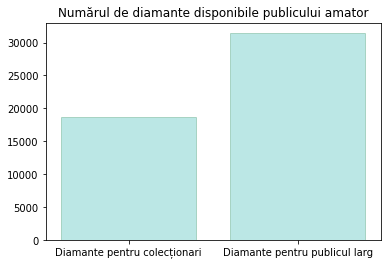

In [ ]:
average_crowd = {'Diamante pentru colecționari': reserve, 'Diamante pentru publicul larg': collection}

plt.bar(average_crowd.keys(), average_crowd.values(), alpha = 0.3, color = 'lightseagreen', edgecolor = 'seagreen')
plt.title('Numărul de diamante disponibile publicului amator')

Continuăm analiza resurselor de diamante împărțindu-le după mărimile lor în trei categorii.

Se vor considera:
1. Diamante mici - diamantele sub 1 carat;
2. Diamante medii - diamantele între 1 și trei carate;
3. Diamante mari - diamante de la 3 carate în sus.

In [ ]:
base_diamond_frequency = {'Mici': 0, 'Medii' : 0, 'Mari': 0}
vip_diamond_frequency = {'Mici': 0, 'Medii' : 0, 'Mari': 0}

for base in collection_diamonds:
  if float(base[1]) < 1:
    base_diamond_frequency['Mici']+=1
  elif float(base[1]) < 3:
    base_diamond_frequency['Medii']+=1
  else:
    base_diamond_frequency['Mari']+=1

for vip in reserved_diamonds:
  if float(vip[1]) < 1:
    vip_diamond_frequency['Mici']+=1
  elif float(vip[1]) < 3:
    vip_diamond_frequency['Medii']+=1
  else:
    vip_diamond_frequency['Mari']+=1   

print('Pentru colecția de bază pot fi considerate diamante: 'base_diamond_frequency)
print('Pentru colecționari sunt accesibile diamante:  'vip_diamond_frequency)

{'Mici': 30317, 'Medii': 1152, 'Mari': 0}
{'Mici': 1456, 'Medii': 17117, 'Mari': 37}


[Text(0, 0, 'Mici'), Text(0, 0, 'Medii'), Text(0, 0, 'Mari')]

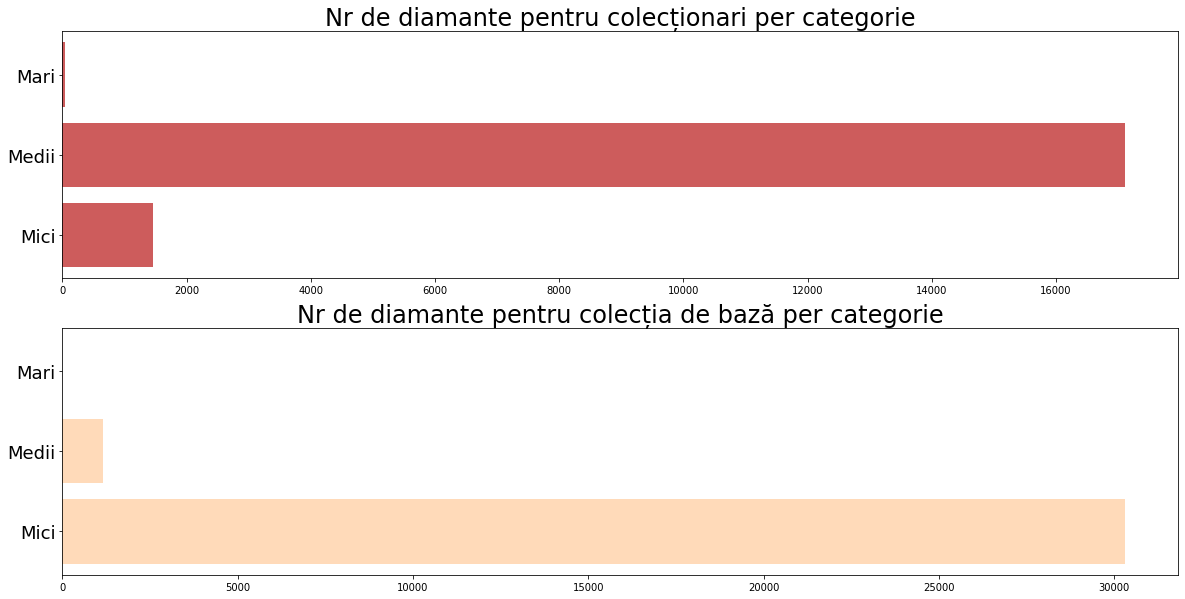

In [ ]:
fig = plt.figure(figsize=(20,10))

ax_vip = fig.add_subplot(2,1,1)
ax_baza = fig.add_subplot(2,1,2)

ax_vip.barh(list(vip_diamond_frequency.keys()), list(vip_diamond_frequency.values()), color = 'indianred')
ax_baza.barh(list(base_diamond_frequency.keys()), list(base_diamond_frequency.values()), color = 'peachpuff')

ax_vip.set_title('Nr de diamante pentru colecționari per categorie', fontsize = 24)
ax_baza.set_title('Nr de diamante pentru colecția de bază per categorie', fontsize = 24)

ax_vip.set_yticklabels(list(vip_diamond_frequency.keys()), fontsize = 18)
ax_baza.set_yticklabels(list(base_diamond_frequency.keys()), fontsize = 18)

🎓 *Concluzia întrebării:*

Din numărul total de **50,079** diamante pe care le putem achiziționa pentru publicul amator, avem **31,469** disponibile pentru colecția de bază și **18,610** pentru colecționari și vedete.

În colecția de bază avem **30,317** diamante mici și **1152** medii.

Rezervate pentru colecționari pot fi **1456** diamante mici, **17117** diamante medii și **37** diamante mari.


## 🔵 Ce prețuri, per categorie și carat, pot fi propuse colecționarilor amatori de diamante?


Analizăm prețurile pentru diamantele suitabile colecționarilor în funcție de mărimea lor.

In [ ]:
small_diamonds_size = []
medium_diamonds_size = []
big_diamonds_size = []
small_diamonds_price = []
medium_diamonds_price = []
big_diamonds_price = []
 
for d in reserved_diamonds:
  if float(d[1]) < 1:
    small_diamonds_size.append([float(d[1])])
    small_diamonds_price.append(float(d[7]))
  elif float(d[1]) < 3:
    medium_diamonds_size.append([float(d[1])])
    medium_diamonds_price.append(float(d[7]))
  else:
    big_diamonds_size.append([float(d[1])])
    big_diamonds_price.append(float(d[7]))

Reprezentăm grafic raportul dintre preț și mărime a diamantelor. 

Text(0, 0.5, 'Carat')

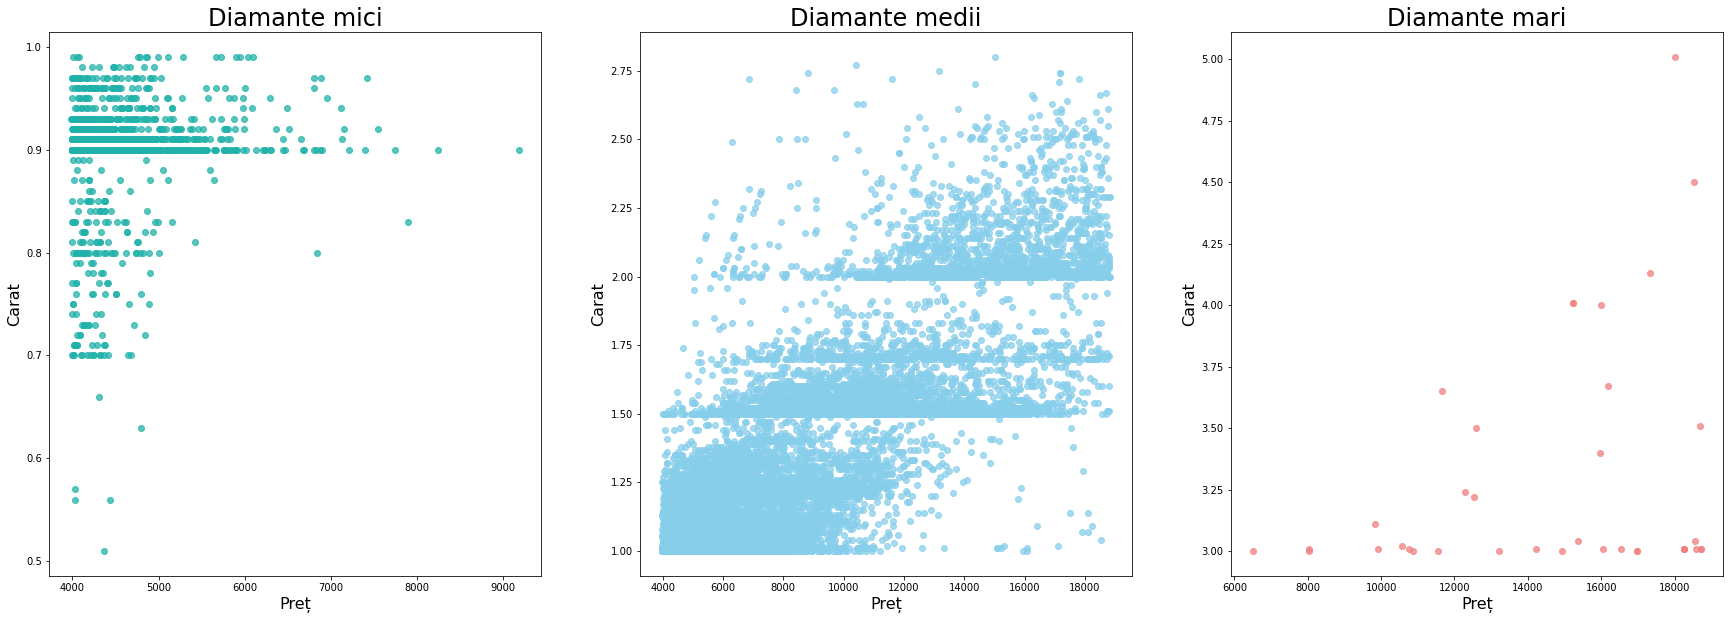

In [ ]:
fig = plt.figure(figsize=(30, 10))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

ax1.scatter(small_diamonds_price, small_diamonds_size, color = 'lightseagreen', alpha = 0.75)
ax2.scatter(medium_diamonds_price, medium_diamonds_size, color = 'skyblue', alpha = 0.75)
ax3.scatter(big_diamonds_price, big_diamonds_size, color = 'lightcoral', alpha = 0.75)

ax1.set_title('Diamante mici', fontsize = 24)
ax1.set_xlabel("Preț", fontsize = 16)
ax1.set_ylabel("Carat", fontsize = 16)

ax2.set_title('Diamante medii', fontsize = 24)
ax2.set_xlabel("Preț", fontsize = 16)
ax2.set_ylabel("Carat", fontsize = 16)

ax3.set_title('Diamante mari', fontsize = 24)
ax3.set_xlabel("Preț", fontsize = 16)
ax3.set_ylabel("Carat", fontsize = 16)

🎓 *Concluzia întrebării*

Prețurile diamantelor rezervate colecționarilor și celebrităților variază în funcție de categorie precum urmează.

Diamante mici: 3,988 - 9,182 ($)

Diamante medii: 3,987 - 18,823 ($)

Diamante mari: 6,512 - 18,710 ($)


##  🟠 Ce importanță are culoarea la alegerea unui diamant accesibil după preț din colecția de bază a acestui sezon?


Culoarea este una din caracteristicile de bază ale unui diamant.
Ea determină tipul metalului cu care acesta poate fi combinat.

Diamantele transparente cu culori considerate de gemologi între D și F se pot afla în orice combinații, neavând tonuri ce ar influența prezentabilitatea bijuteriei. 

Diamantele aproape incolore, însă, prezintă o problemă, nuanțele ușor gălbui ale acestora contrastând cu metale precum aur alb, platină sau argint și dând impresia unei lucrări inferioare.

De aceea este necesară determinarea și separarea diamantelor de culori diferite. 

![Diamond colors](https://drive.google.com/uc?export=view&id=1sKAf9JrGHAtmK8uOWMJ-KIgxVo4af7SW)

Împărțim diamantele după culoare, însă stocăm în liste doar prețurile lor, pentru a crea apoi un grafic boxplot.

In [ ]:
color_d=[]
color_e=[]
color_f=[]
color_g=[]
color_h=[]
color_i=[]
color_j=[]
for diam in collection_diamonds:
  if diam[3] =="D":
   color_d.append(float(diam[7]))
  elif diam[3]=="E":
   color_e.append(float(diam[7]))
  elif diam[3]=="F":
   color_f.append(float(diam[7]))
  elif diam[3]=="G":
    color_g.append(float(diam[7]))
  elif diam[3]=="H":
    color_h.append(float(diam[7]))
  elif diam[3]=="I":
    color_i.append(float(diam[7]))
  elif diam[3]=="J":
    color_j.append(float(diam[7]))

print(len(color_d)) 
print(len(color_e))
print(len(color_f))
print(len(color_g))
print(len(color_h))
print(len(color_i))
print(len(color_j))

4467
6276
5163
7066
4381
2818
1298


In [ ]:
data_for_boxplot=[color_d, color_e, color_f, color_g, color_h, color_i, color_j]

Creăm graficul boxplot pentru a vedea dacă se schimbă prețul în dependeță de culoarea diamantelor. La fel în acest grafic putem observa prețurile medii pe culori.

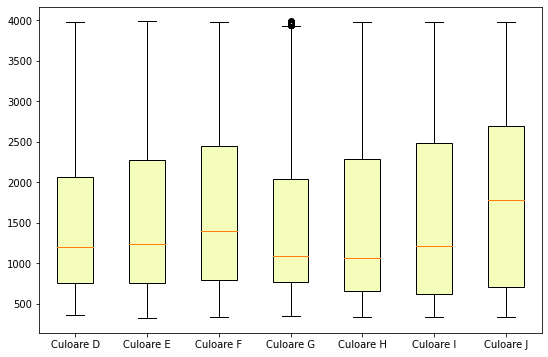

In [ ]:
fig=plt.figure(1, figsize=(9, 6))

ax=fig.add_subplot(111)
bp=ax.boxplot(data_for_boxplot, patch_artist=True)
for box in bp['boxes']:
 box.set(facecolor='#f4feba')
ax.set_xticklabels(['Culoare D', 'Culoare E', 'Culoare F', 'Culoare G', 'Culoare H', 'Culoare I', 'Culoare J'])
fig.savefig('fig1.png', bbox_inches='tight')

Întrucât prețul nu variază foarte mult, putem începe procedura de împărțire a diamantelor pe colecții: cea de aur și cea de argint. 

In [ ]:
colectie_argint=(len(color_d))+(len(color_e))+(len(color_f))
print(str(colectie_argint)+" diamante in colectia de argint")
colectie_aur=(len(color_g))+(len(color_h))+(len(color_i))+(len(color_j))
print(str(colectie_aur)+ " diamante in colectia de aur")

15906 diamante in colectia de argint
15563 diamante in colectia de aur


Creăm o reprezentare vizuală a diamantelor repartizate pe colecții:

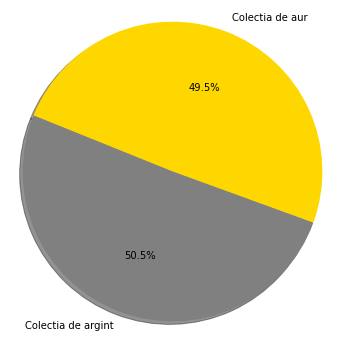

In [ ]:
fig=plt.figure(figsize=(6,6))
labels='Colectia de aur', 'Colectia de argint'
sizes=[colectie_aur, colectie_argint]
colors=['gold', 'grey']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=340)
plt.axis('equal')
plt.show()

🎓 *Concluzia întrebării:*

Prețul diamantelor nu depinde substanțial de culoarea lui, media de preț pentru toate culorile menținându-se între 1000 și 1500 de dolari. 




## ⚪ Care sunt seturile de bijuterii care pot fi formate pentru următorul sezon?


*Diamantele cu caracteristici asemănătoare pot fi adunate în grupuri, pentru a crea seturi de bijuterii. Mai întâi, ștergem din lista de diamante cele care au defecte vizibile în "clarity": ele nu sunt eligibile pentru formarea seturilor.*

In [ ]:
d_ok=[]
d_nope=[]
for diam in collection_diamonds:
   if diam[4] != "I1"and diam[2] !="Fair":
    d_ok.append(diam)
   else:
    d_nope.append(diam)
print(str(len(d_ok))+" diamante au claritate destul de mare")
print(str(len(d_nope))+ " diamante nu sunt eligibile")

30204 diamante au claritate destul de mare
1265 diamante nu sunt eligibile


Acum determinăm câte diamante vor face parte din seturile de aur și câte diamante vor face parte din seturile de argint.




In [ ]:
d_aur=[]
d_argint=[]
color_argint="DEF"
color_aur="GHIJ"
for diam in d_ok:
 if color_argint.find(diam[3]) > -1 :
  d_argint.append(diam)
 elif color_aur.find(diam[3])> -1:
  d_aur.append(diam)
print('Avem %i diamante in seturile de aur' %len(d_aur))  
print('Avem %i diamante in seturile de argint' %len(d_argint))

Avem 14887 diamante in seturile de aur
Avem 15317 diamante in seturile de argint


### 🥈 Studiem setul de argint

*Căutam diamantele care au aceeași 'color'și calitatea 'clarity' asemănătoare, și le grupam. Trebuie să determinăm ce fel de grupuri s-au format și câte diamante sunt în fiecare grup.* 

In [ ]:
color_d=[]
color_e=[]
color_f=[]

for diam in d_argint:
  if diam[3] =="D":
   color_d.append(diam)
  elif diam[3]=="E":
   color_e.append(diam)
  elif diam[3]=="F":
   color_f.append(diam) 
print('Diamante de culoarea D: %i' %len(color_d)) 
print('Diamante de culoarea E: %i' %len(color_e))
print('Diamante de culoarea F: %i' %len(color_f))  
   

Diamante de culoarea D: 4345
Diamante de culoarea E: 6073
Diamante de culoarea F: 4899


Diamantele de fiecare culoare le împărțim acum după claritate. Începem cu seturile de argint care sunt mai deschise la culoare. 

In [ ]:
color_d_claritate_if=[]
color_d_claritate_vvs=[]
color_d_claritate_vs=[]
color_d_claritate_si=[]
color_e_claritate_if=[]
color_e_claritate_vvs=[]
color_e_claritate_vs=[]
color_e_claritate_si=[]
color_f_claritate_if=[]
color_f_claritate_vvs=[]
color_f_claritate_vs=[]
color_f_claritate_si=[]
def seturi(color_d, lista1, lista2, lista3, lista4, col):
 for diam in color_d:
  if diam[4] =="IF":
   lista1.append(diam)
  elif diam[4]=="VVS1" or "VVS2":
   lista2.append(diam)
  elif diam[4]=="VS1" or "VS2":
   lista3.append(diam) 
  elif diam[4]=="SI1" or "SI2" :
    lista4.append(diam)
 print('Diamante de culoarea %s claritate if: %i' %(col ,len(lista1))) 
 print('Diamante de culoarea %s claritate vvs: %i' %(col ,len(lista2)))
 print('Diamante de culoarea %s claritate vs: %i' %(col ,len(lista3)))
 print('Diamante de culoarea %s claritate si: %i' %(col ,len(lista4)))
seturi(color_d, color_d_claritate_if, color_d_claritate_vvs, color_d_claritate_vs, color_d_claritate_si, "d")
seturi(color_e, color_e_claritate_if, color_e_claritate_vvs, color_e_claritate_vs, color_e_claritate_si, "e")
seturi(color_f, color_f_claritate_if, color_f_claritate_vvs, color_f_claritate_vs, color_f_claritate_si, "f")

Diamante de culoarea d claritate if: 8
Diamante de culoarea d claritate vvs: 4337
Diamante de culoarea d claritate vs: 0
Diamante de culoarea d claritate si: 0
Diamante de culoarea e claritate if: 37
Diamante de culoarea e claritate vvs: 6036
Diamante de culoarea e claritate vs: 0
Diamante de culoarea e claritate si: 0
Diamante de culoarea f claritate if: 56
Diamante de culoarea f claritate vvs: 4843
Diamante de culoarea f claritate vs: 0
Diamante de culoarea f claritate si: 0


**Observație** : diamantele deschise la culoare au claritate superioară. 

### 🥇 Studiem setul de aur

In [ ]:
color_g=[]
color_h=[]
color_i=[]
color_j=[]

for diam in d_aur:
  if diam[3] =="G":
   color_g.append(diam)
  elif diam[3]=="H":
   color_h.append(diam)
  elif diam[3]=="I":
   color_i.append(diam) 
  elif diam[3]=="J":
   color_j.append(diam) 
print('Diamante de culoarea G: %i' %len(color_g)) 
print('Diamante de culoarea H: %i' %len(color_h))
print('Diamante de culoarea I: %i' %len(color_i))  
print('Diamante de culoarea F: %i' %len(color_j))  

Diamante de culoarea G: 6818
Diamante de culoarea H: 4169
Diamante de culoarea I: 2680
Diamante de culoarea F: 1220


In [ ]:
color_g_claritate_if=[]
color_g_claritate_vvs=[]
color_g_claritate_vs=[]
color_g_claritate_si=[]
color_h_claritate_if=[]
color_h_claritate_vvs=[]
color_h_claritate_vs=[]
color_h_claritate_si=[]
color_i_claritate_if=[]
color_i_claritate_vvs=[]
color_i_claritate_vs=[]
color_i_claritate_si=[]
color_j_claritate_if=[]
color_j_claritate_vvs=[]
color_j_claritate_vs=[]
color_j_claritate_si=[]
seturi(color_g, color_g_claritate_if, color_g_claritate_vvs, color_g_claritate_vs, color_g_claritate_si, "g")
seturi(color_h, color_h_claritate_if, color_h_claritate_vvs, color_h_claritate_vs, color_h_claritate_si, "h")
seturi(color_i, color_i_claritate_if, color_i_claritate_vvs, color_i_claritate_vs, color_i_claritate_si, "i")
seturi(color_j, color_j_claritate_if, color_j_claritate_vvs, color_j_claritate_vs, color_j_claritate_si, "j")

Diamante de culoarea g claritate if: 568
Diamante de culoarea g claritate vvs: 6250
Diamante de culoarea g claritate vs: 0
Diamante de culoarea g claritate si: 0
Diamante de culoarea h claritate if: 262
Diamante de culoarea h claritate vvs: 3907
Diamante de culoarea h claritate vs: 0
Diamante de culoarea h claritate si: 0
Diamante de culoarea i claritate if: 127
Diamante de culoarea i claritate vvs: 2553
Diamante de culoarea i claritate vs: 0
Diamante de culoarea i claritate si: 0
Diamante de culoarea j claritate if: 40
Diamante de culoarea j claritate vvs: 1180
Diamante de culoarea j claritate vs: 0
Diamante de culoarea j claritate si: 0


**Creăm graficele:**

Text(0.5, 0, 'Numar')

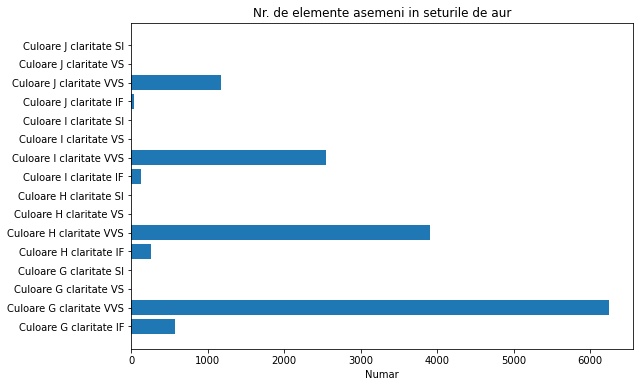

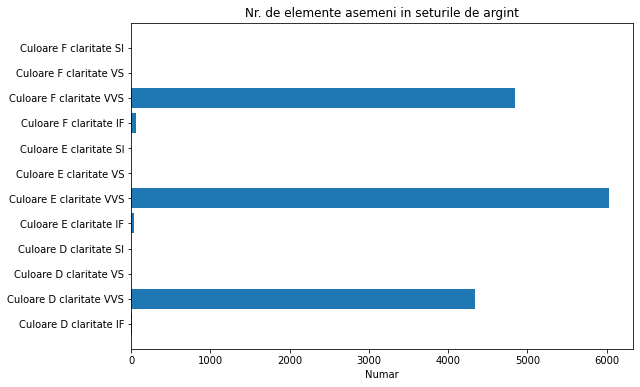

In [ ]:

fig=plt.figure(figsize=(9,6))
grupuri=['Culoare G claritate IF', 'Culoare G claritate VVS', 'Culoare G claritate VS', 'Culoare G claritate SI',
         'Culoare H claritate IF', 'Culoare H claritate VVS', 'Culoare H claritate VS', 'Culoare H claritate SI',
         'Culoare I claritate IF', 'Culoare I claritate VVS', 'Culoare I claritate VS', 'Culoare I claritate SI',
         'Culoare J claritate IF', 'Culoare J claritate VVS', 'Culoare J claritate VS', 'Culoare J claritate SI']
nr_de_diamante=[len(color_g_claritate_if), len(color_g_claritate_vvs), len(color_g_claritate_vs), len(color_g_claritate_si),
                len(color_h_claritate_if), len(color_h_claritate_vvs), len(color_h_claritate_vs), len(color_h_claritate_si),
                len(color_i_claritate_if), len(color_i_claritate_vvs), len(color_i_claritate_vs), len(color_i_claritate_si),
                len(color_j_claritate_if), len(color_j_claritate_vvs), len(color_j_claritate_vs), len(color_j_claritate_si)]
plt.title("Nr. de elemente asemeni in seturile de aur")
plt.barh(grupuri, nr_de_diamante) 
plt.xlabel("Numar")
fig=plt.figure(figsize=(9,6))
grupuri=['Culoare D claritate IF', 'Culoare D claritate VVS', 'Culoare D claritate VS', 'Culoare D claritate SI',
         'Culoare E claritate IF', 'Culoare E claritate VVS', 'Culoare E claritate VS', 'Culoare E claritate SI',
         'Culoare F claritate IF', 'Culoare F claritate VVS', 'Culoare F claritate VS', 'Culoare F claritate SI']
nr_de_diamante=[len(color_d_claritate_if), len(color_d_claritate_vvs), len(color_d_claritate_vs), len(color_d_claritate_si),
                len(color_e_claritate_if), len(color_e_claritate_vvs), len(color_e_claritate_vs), len(color_e_claritate_si),
                len(color_f_claritate_if), len(color_f_claritate_vvs), len(color_f_claritate_vs), len(color_f_claritate_si)]

plt.barh(grupuri, nr_de_diamante)    
plt.title("Nr. de elemente asemeni in seturile de argint") 
plt.xlabel("Numar")    

**Concluzii:** Majoritatea diamantelor din ambele colecții au o claritate *ideală* sau *aproape ideală*, iar culoarea lor este destul de deschisă pentru a asigura *strălucire* și *farmec* seturilor de diamante. 

🎓 *Concluzia întrebării:*

diamantele pot fi împărțite în 14 seturi în dependență de culoare și claritate. 6 seturi pot fi incluse în colecția de argint, având o culoare mai deschisă (aproape transparent), 8 seturi pot fi incluse în colecția de aur, având o culoare usor gălbuie. 

Dintre seturile pentru bijuterii de argint 3 au claritate maximă, celelalte 3 au claritate aproape ideală (cu incluziuri greu de observat chiar și la mărirea de 100 de ori). În total ele conțin 15317 diamante.

Dintre seturile pentru bijuterii de argint 4 au claritate maximă, celelalte 4 au claritate aproape ideală. În total ele conțin 14887 de diamante. 

# ✒ **Încheiere**

A avea acces la resurse nu e destul pentru a-ți asigura succesul. Trebuie să știi și cum să le folosești.

Deși diamantele nu sunt pietre rare, lumea lor e controlată de către companii cu miliarde de dolari la dispoziție pentru a strivi concurența. Cu toate acestea, noi suntem mai mult ca siguri că ținând cont de propunerile noastre, compania Diamonds Bois își va croi și ea un loc în liga lor, odată ce își va schimba numele, firește.

# **✨ Bibliografie și resurse utilizate**

Instrumentele utilizate:

1.1. https://girlsgoitpublic.z6.web.core.windows.net/diamonds.csv

1.2. https://matplotlib.org/3.3.0/tutorials/introductory/pyplot.html

1.3. https://wiki.girlsgoit.org/data-science/introducere-in-data-science

1.4. https://trello.com/b/xoND2s6p/diamonds

Informații cu privire la prețurile diamantelor:

2.1. https://www.leador.ro/pretul-diamantelor-de-1-carat/

2.2. https://www.diamante.ro/inele-de-logodna

Informații cu privire la calitatea diamantelor:

3.1.https://www.gia.edu/diamond-quality-factor

3.2. https://www.lumeradiamonds.com/buying-diamonds/choose-a-diamond

3.3. https://www.diamonds.pro/education/diamond-depth-and-table/

Informații cu privire la traducerea denumirii termenilor:

4.1 https://ro.wikipedia.org/wiki/Diamant

4.2 https://www.artofdiamonds.ro/partile-unei-pietre-pretioase-si-forma-d

# **🪕Credits**

Studiul a fost realizat de echipa Delta-Salem Girls (**Iuliana Jubea, Mihaela Catan și Scripca Lina**) din cadrul programului Tabăra de Vară STEM 'Girls Go IT' pentru compania Diamonds Bois™️.

# ![alt text](https://drive.google.com/uc?export=view&id=13nhnc1jKu84Cjoj7UZad25BCYeeIXvsk)